In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
sns.set_theme()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

## Data Exploration

Let's begin with a look at the training data set.

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We have a few columns which we can be reasonably sure don't contribute to survival rate:
* Name
* Ticket
* Fare
* Embarked

For the rest, let's look through the data columns:

## Pclass and Cabin

These two columns give an idea of how rich or poor a passenger was, which also can influence where they could have been at the time of the disaster. Richer passengers were (probably) more likely to be found on the upper decks, giving them easier access to the life boats.

In [4]:
# Checking out the unique values of Pclass
np.unique(train_data["Pclass"])

array([1, 2, 3])

In [5]:
# Check for missing data in Pclass
np.count_nonzero(np.isnan(train_data["Pclass"]))

0

<Axes: xlabel='Pclass', ylabel='Count'>

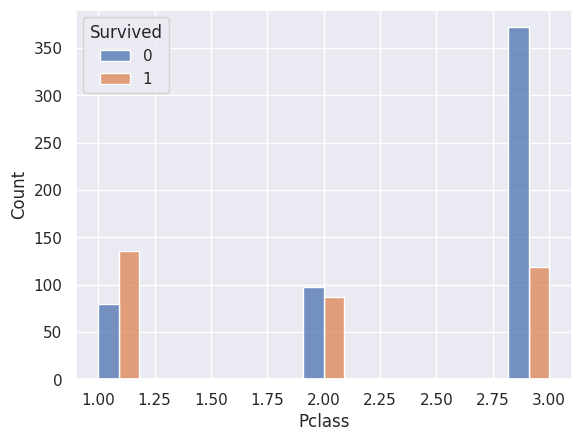

In [6]:
# Let's get a view of the survivors based on class
sns.histplot(data = train_data, x = 'Pclass', hue = "Survived",  multiple = "dodge")

As we can see above, despite 3rd class passengers being the majority of the population aboard the Titanic, more 1st class passengers managed to survive. Clearly a person's class had influenced their chances of survival.

In [7]:
np.unique(train_data["Cabin"][~train_data["Cabin"].isnull()])

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='Cabin', ylabel='Count'>

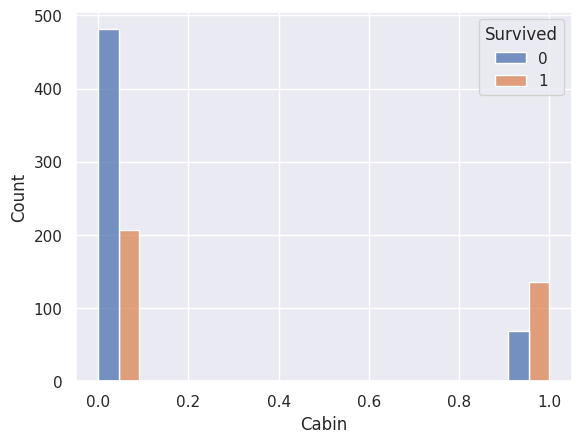

In [8]:
# Check to see survivors among those with cabins
sns.histplot(x = ~train_data["Cabin"].isnull(), hue = train_data["Survived"], multiple = 'dodge')

<Axes: xlabel='Pclass', ylabel='Count'>

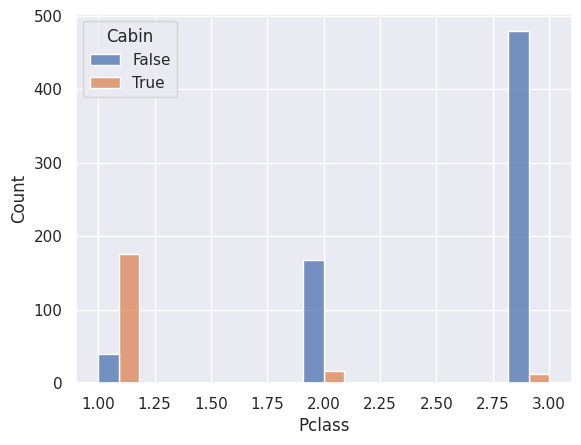

In [9]:
# Check to see survivors among those with cabins
sns.histplot(x = train_data["Pclass"], hue = ~train_data["Cabin"].isnull(), multiple = 'dodge')

As we can see here, simply having a cabin seemed to have an effect on survival rate, and cabins were occupied overwhelmingly by those in the first class.

## Age and Sex

Let's see if priority was given to women and children:

<Axes: xlabel='Sex', ylabel='Count'>

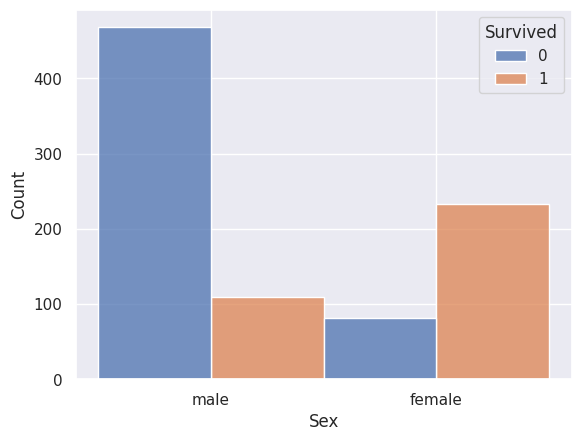

In [10]:
sns.histplot(data = train_data, x = 'Sex', hue = 'Survived', multiple = "dodge")

<Axes: xlabel='Age', ylabel='Count'>

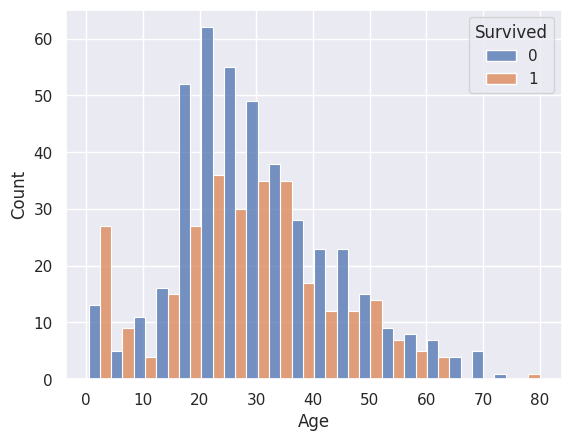

In [11]:
sns.histplot(train_data, x = 'Age', hue = "Survived", multiple = 'dodge')